In [10]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

# Boston housing Price dataset

Lets have a look at the dataset structure:

In [11]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("train spec")
print(train_data.shape)
print(len(train_targets))

print("\ntest spec")
print(test_data.shape)
print(len(test_targets))


train spec
(404, 13)
404

test spec
(102, 13)
102
train spec
(404, 13)
404

test spec
(102, 13)
102


The data is inserted in a *Tensor* of *order* 2, where the first axis is the data column, while the second axis contains and array of 13 values.

Let us plot some histograms:

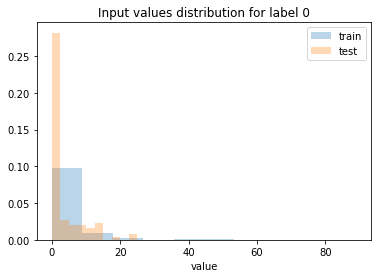

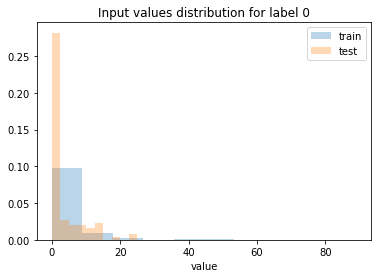

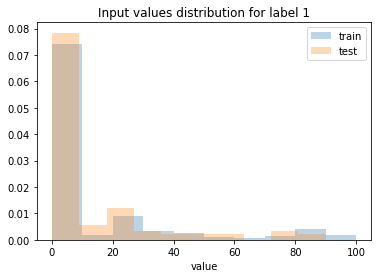

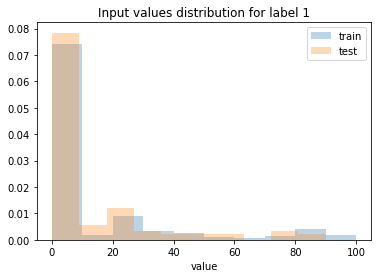

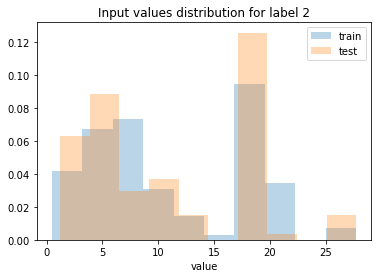

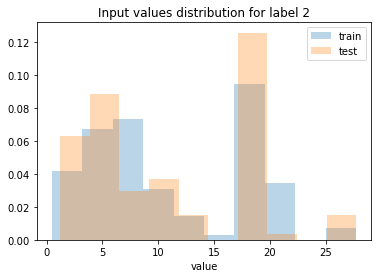

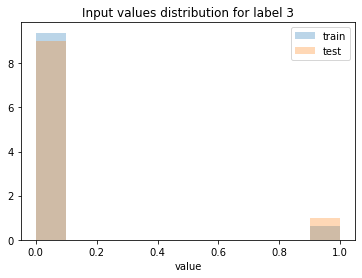

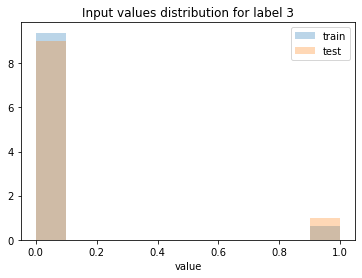

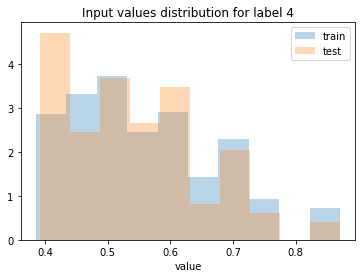

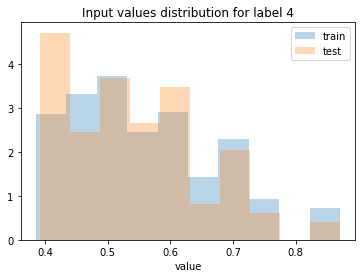

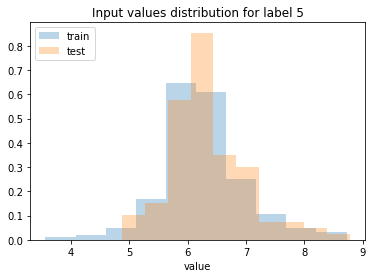

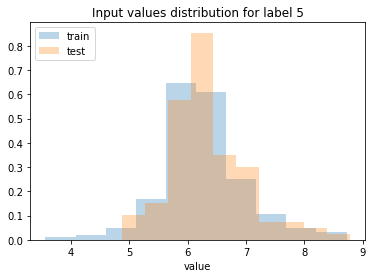

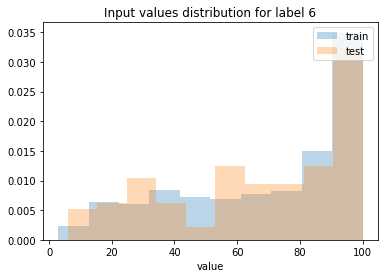

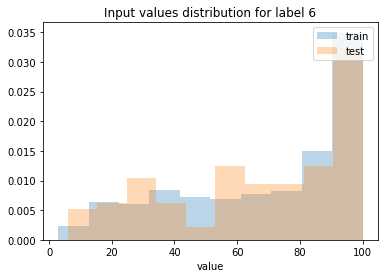

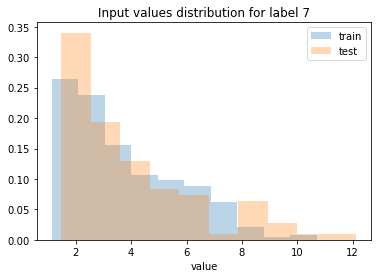

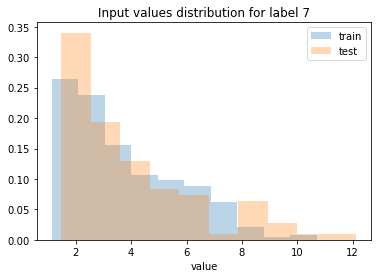

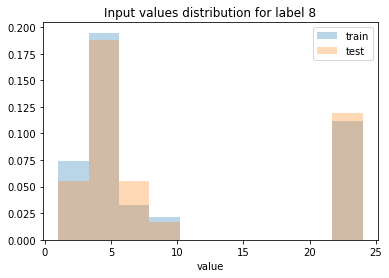

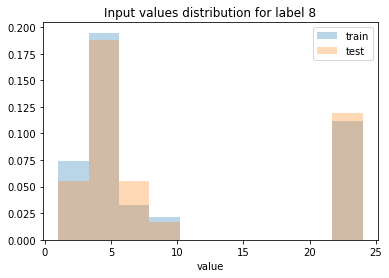

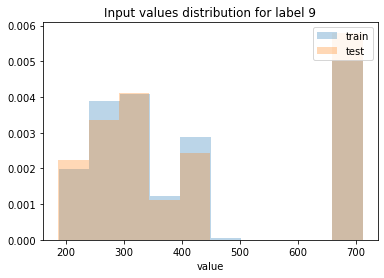

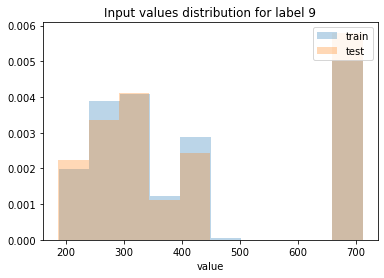

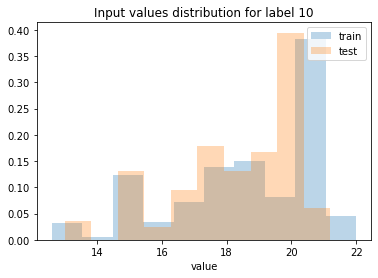

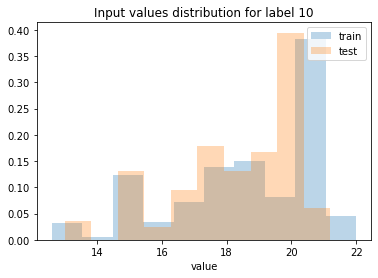

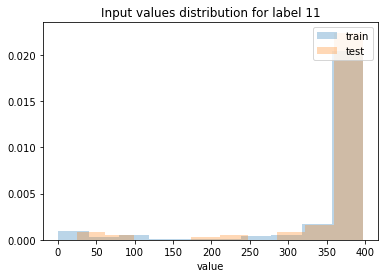

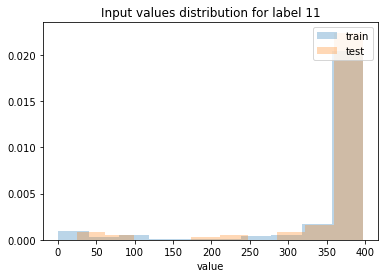

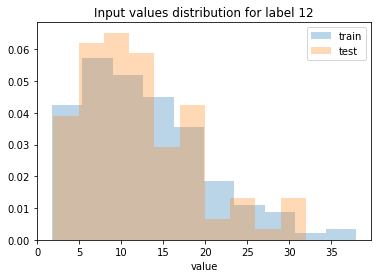

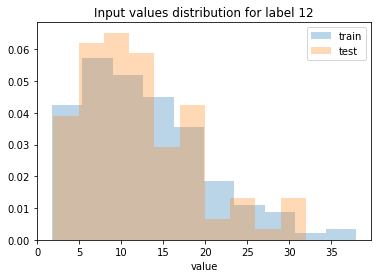

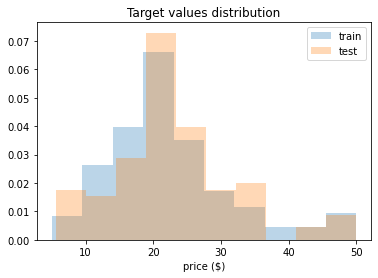

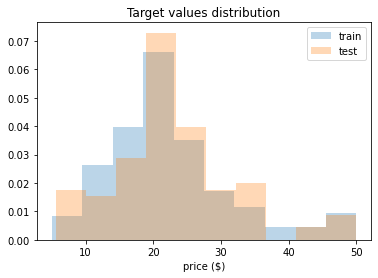

In [12]:
import matplotlib.pyplot as plt

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10, density=True)

for i in range(train_data.shape[1]):
  plt.title("Input values distribution for label {}".format(i))
  plt.hist(train_data[:,i],label="train",**kwargs)
  plt.hist(test_data[:,i],label="test",**kwargs)
  plt.xlabel("value")
  plt.legend()
  plt.show()
  plt.close()

plt.title("Target values distribution")
plt.hist(train_targets,label="train",**kwargs)
plt.hist(test_targets,label="test",**kwargs)
plt.xlabel("price ($)")
plt.legend()
plt.show()
plt.close()


Try to normalise the data. For each of the 13 parameters subtract the mean value (computed over the training dataset) and divide by its standard deviation (computed over the training dataset).

With the same meand and std values normalise the test set. Never normalise the test set with parameters obtained from the test set.

once normalised repeat the previous plots and see if the normalisation went well.

## Simple architecture

Little data is available in this dataset. Therefore, it is better to build a small network to avoid overfitting.

In [13]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation="relu",input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation="relu"))
  model.add(layers.Dense(1))

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  model.summary()

  return model

# Exercise

1) Create the model and fit with the train data

2) Try the trained model on the test data

3) How can we follow the training of the model ? (tip: assing the fit to a variable and all the history variable)

## Results

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [15]:
print(mean.shape)

(13,)
(13,)


In [16]:
model = build_model()
history = model.fit(train_data,
          train_targets,
          epochs=100,
          batch_size=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)  

5/5 [==============================] - 0s 1ms/step - loss: 40.1692 - mae: 4.7329
Epoch 27/100
Epoch 27/100
5/5 [==============================] - 0s 1ms/step - loss: 35.8470 - mae: 4.4419
Epoch 28/100
5/5 [==============================] - 0s 1ms/step - loss: 33.8002 - mae: 4.3019
Epoch 29/100
5/5 [==============================] - 0s 1ms/step - loss: 32.0958 - mae: 4.1361
Epoch 30/100
5/5 [==============================] - 0s 1ms/step - loss: 30.4362 - mae: 4.0545
Epoch 31/100
5/5 [==============================] - 0s 1ms/step - loss: 29.0823 - mae: 3.9642
Epoch 32/100
5/5 [==============================] - 0s 1ms/step - loss: 27.7701 - mae: 3.8570
Epoch 33/100
5/5 [==============================] - 0s 1ms/step - loss: 27.0088 - mae: 3.7716
Epoch 34/100
5/5 [==============================] - 0s 1ms/step - loss: 25.7045 - mae: 3.7231
Epoch 35/100
5/5 [==============================] - 0s 1ms/step - loss: 24.8120 - mae: 3.5810
Epoch 36/100Epoch 36/100

5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 14.6657 - mae: 2.6986
Epoch 61/100
5/5 [==============================] - 0s 1ms/step - loss: 14.2393 - mae: 2.6700
Epoch 62/100
5/5 [==============================] - 0s 1ms/step - loss: 14.1642 - mae: 2.6863
Epoch 63/100Epoch 63/100
5/5 [==============================] - 0s 1ms/step - loss: 14.1312 - mae: 2.6498
Epoch 64/100
Epoch 64/100
5/5 [==============================] - 0s 1ms/step - loss: 13.5137 - mae: 2.5853
Epoch 65/100

5/5 [==============================] - 0s 1ms/step - loss: 13.4878 - mae: 2.6017
Epoch 66/100
5/5 [==============================] - 0s 1ms/step - loss: 13.2973 - mae: 2.5452
Epoch 67/100
5/5 [==============================] - 0s 1ms/step - loss: 13.3242 - mae: 2.5472
Epoch 68/100
Epoch 68/100
5/5 [==============================] - 0s 1ms/step - loss: 12.6752 - mae: 2.5062
Epoch 69/100Epoch 69/100

5/5 [==============================] - 0s 1ms/step - loss: 12.7030 - mae: 2.4832
Epoch 70/100
5/5 [===

Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 9.8911 - mae: 2.2010
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 9.7351 - mae: 2.1993
Epoch 96/100
5/5 [==============================] - 0s 1ms/step - loss: 10.2613 - mae: 2.2992
Epoch 97/100
5/5 [==============================] - 0s 1ms/step - loss: 9.7670 - mae: 2.2162
Epoch 98/100
5/5 [==============================] - 0s 1ms/step - loss: 9.7544 - mae: 2.2259
Epoch 99/100
5/5 [==============================] - 0s 1ms/step - loss: 9.5609 - mae: 2.1661
Epoch 100/100
5/5 [==============================] - 0s 1ms/step - loss: 9.6998 - mae: 2.1957


In [17]:
test_loss, test_acc = model.evaluate(test_data,test_targets)
print("loss = {}\nAcc. = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 1ms/step - loss: 24.9883 - mae: 3.2228
loss = 24.988296508789062
Acc. = 3.2227752208709717loss = 24.988296508789062
Acc. = 3.2227752208709717



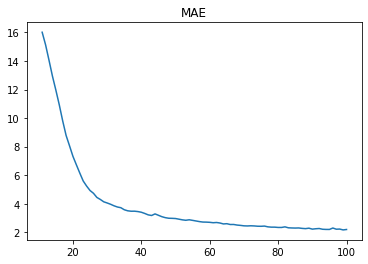

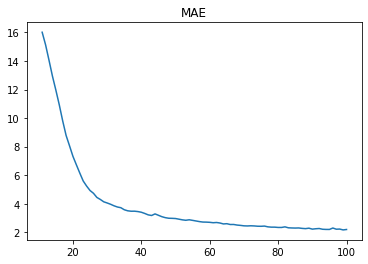

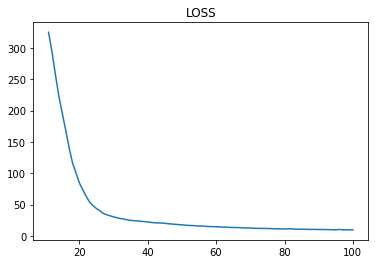

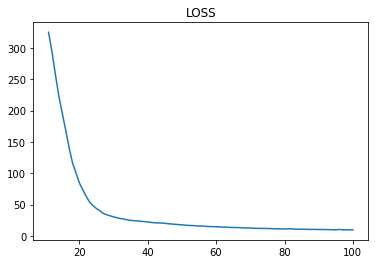

In [18]:
loss = history.history['loss']
acc  = history.history['mae']

epochs = np.array(range(1,101))

plt.title("MAE")
plt.plot(epochs[10:],acc[10:])
plt.show()
plt.close()

plt.title("LOSS")
plt.plot(epochs[10:],loss[10:])
plt.show()
plt.close()